In [1]:
# look at ITL fits files generated by POC. We are looking at QE
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
import astropy.stats
from astropy.io import fits
import scipy as sc
import scipy.signal
import textwrap
import pylab

# this next magic command makes plots appear within the notebook
%matplotlib inline

# define figure size parameters to make figures larger than default
figwidth=10
figheight=10

In [2]:
# open a FITS file 
hdulist017=fits.open("ITL-3800C-017_QE.fits")

# look at objects that reside within this "list". Note this list is zero-based.
hdulist017.info()


Filename: ITL-3800C-017_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [3]:
# convert header to string and print header information for primary header 
#print "----------extension 0 header-------------" # common to all HDU elements for this image
#print " "
#print textwrap.fill(str(hdulist[0].header),80) # this slightly obscure syntax makes printout 80 columns wide


In [4]:
# print first extension's header
#print "----------extension 1 header-------------" # amplifier-specific header info, mostly pixel placement information
#print "  "
#print textwrap.fill(str(hdulist[1].header),80) 

In [5]:
#print "----------extension 2 header-------------" # amplifier-specific header info, mostly pixel placement information
#print "  "
#print textwrap.fill(str(hdulist[2].header),80) 

In [6]:
qedata=hdulist017[1].data

In [7]:
qecurve=qedata['AMP01']
avg017=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg017)
#for index in range(len(qecurve)):
#  print a[index]

[ 59.39194489  66.03002167  71.16736603  73.99382019  73.8247757
  76.99515533  80.11645508  81.42749023  82.05428314  81.86510468
  82.18251801  81.63618469  81.70106506  81.42103577  81.39767456
  81.56797791  81.66210938  82.18344879  82.62358093  83.41578674
  83.80818176  84.25384521  85.32139587  85.94861603  86.29241943
  87.48681641  88.07559204  89.04412842  89.29019165  90.17047119
  90.27245331  90.68912506  91.3704071   91.60055542  91.99300385
  92.34580994  92.27526855  93.0038681   92.93735504  92.81260681
  92.87911987  92.97025299  93.02445221  93.1295166   93.13852692
  93.00321198  92.64007568  92.80105591  92.52812958  92.30206299
  92.62937164  92.12017059  91.22966003  90.31621552  88.30577087
  87.21026611  84.75067139  82.48745728  79.69897461  76.51145172
  72.43294525  68.27716064  63.47428894  58.03417206  51.49940872
  45.01450348  38.26790619  32.19264221  25.41296196  21.67492676
  15.9273262   11.7262249    8.85676193   8.14454365   7.07416964
   6.066938

In [8]:
#print qecurve[0:100]

In [9]:
wavelength=qedata['WAVELENGTH']
print (wavelength)

[  320.00601196   330.00698853   339.9960022    350.00900269   360.00698853
   369.99200439   379.99798584   389.98999023   400.00299072   410.
   420.01699829   430.01699829   440.           450.00100708   459.98400879
   469.98498535   480.00299072   490.00100708   500.01501465   510.00799561
   520.01599121   530.00201416   540.00201416   550.01397705   560.00402832
   570.00500488   580.01702881   590.00500488   600.00201416   610.00799561
   619.98797607   630.01000977   640.00500488   650.00598145   660.01300049
   669.98999023   680.00598145   689.99102783   700.01300049   710.00299072
   719.99401855   729.98498535   740.01098633   750.           759.98797607
   770.00701904   779.98797607   789.99798584   800.00201416   810.
   819.98999023   830.00402832   840.00897217   850.00299072   869.98797607
   880.00897217   890.01501465   900.00500488   910.01000977   919.99597168
   929.99499512   940.00402832   949.99102783   959.98498535   969.98602295
   979.99102783   989.999023

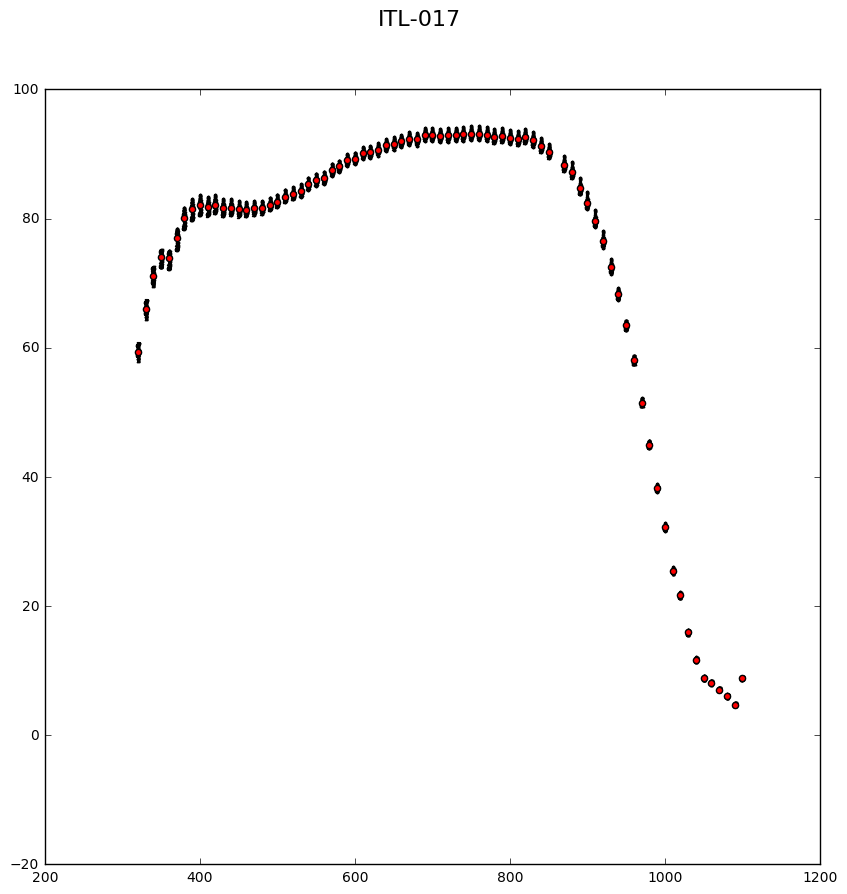

In [10]:
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-017', fontsize=16)

plt.scatter(wavelength, qecurve, 10, 'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg017, 20,'r')

In [11]:
fig1.savefig('ITL-017.pdf')

[ 41.52256393  44.55620956  48.25205231  52.30249405  56.117836
  66.17786407  76.4910965   83.1583786   87.01425934  89.38544464
  91.1326828   91.01209259  91.02391815  90.82431793  89.96353912
  89.44635773  89.17111969  88.39276123  87.75850677  87.25884247
  86.91078186  86.80953217  87.10325623  87.04746246  86.72434998
  87.29447937  87.63969421  87.85123444  88.32607269  88.50718689
  88.74280548  89.15196228  89.50981903  89.97357941  90.41622162
  90.70998383  91.08552551  91.78794098  91.87750244  92.17545319
  92.60503387  93.02324677  93.23045349  93.64349365  93.80290985
  93.74994659  93.93346405  94.49571228  94.27180481  94.55957794
  94.67430878  94.44048309  93.58390808  92.61305237  90.79776764
  89.88868713  87.63019562  84.86528778  81.77394867  78.38288116
  73.62492371  68.88845062  63.26089478  57.36342621  50.75949097
  44.3209343   37.8414917   31.63371468  25.1483345   19.95939255
  15.42694378  11.17934608   8.57412148   7.74830627   6.76379156
   5.6978659

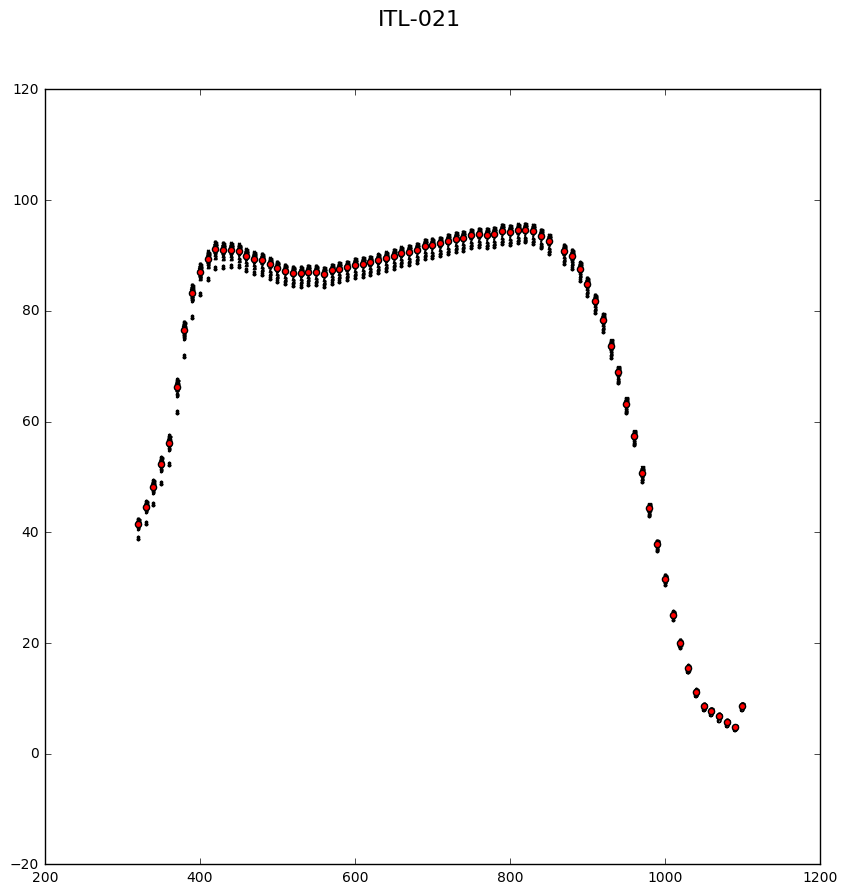

In [12]:
hdulist021=fits.open("ITL-3800C-021_QE.fits")
qedata=hdulist021[1].data
avg021=(qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15'])/14
print (avg021)
print ('AMP01 and AMP016 are bad and are omitted')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-021', fontsize=16)
#plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg021, 20,'r')
fig1.savefig('ITL-021.pdf')

[ 51.53768158  57.71205139  63.34450912  68.10353088  70.76416016
  77.38697052  82.00823212  84.29997253  85.26946259  85.21297455
  84.95983887  84.54096222  84.27451324  83.24536896  82.79379272
  82.58655548  82.50430298  82.77029419  82.76667023  83.00614166
  83.5414505   84.27438354  85.07968903  85.45833588  85.72956085
  86.87156677  87.50411224  88.21295166  88.79362488  89.51101685
  89.95368958  90.2253418   91.13460541  90.98318481  91.6379776
  91.89343262  92.39337158  92.75187683  92.82605743  93.11902618
  93.38657379  93.64764404  93.77848053  93.65737915  93.70513916
  93.76404572  93.63381195  94.01204681  93.96616364  93.48948669
  93.55822754  93.19272614  92.78746796  91.54852295  89.76573181
  88.80370331  86.21932983  83.82271576  80.89122009  77.782547
  73.76256561  69.77498627  64.5821228   59.11676407  52.50130463
  45.8306694   39.0112114   32.79538345  26.07364082  21.08290291
  16.49078751  12.31312561   9.2156105    8.47261238   7.42872095
   6.44305658

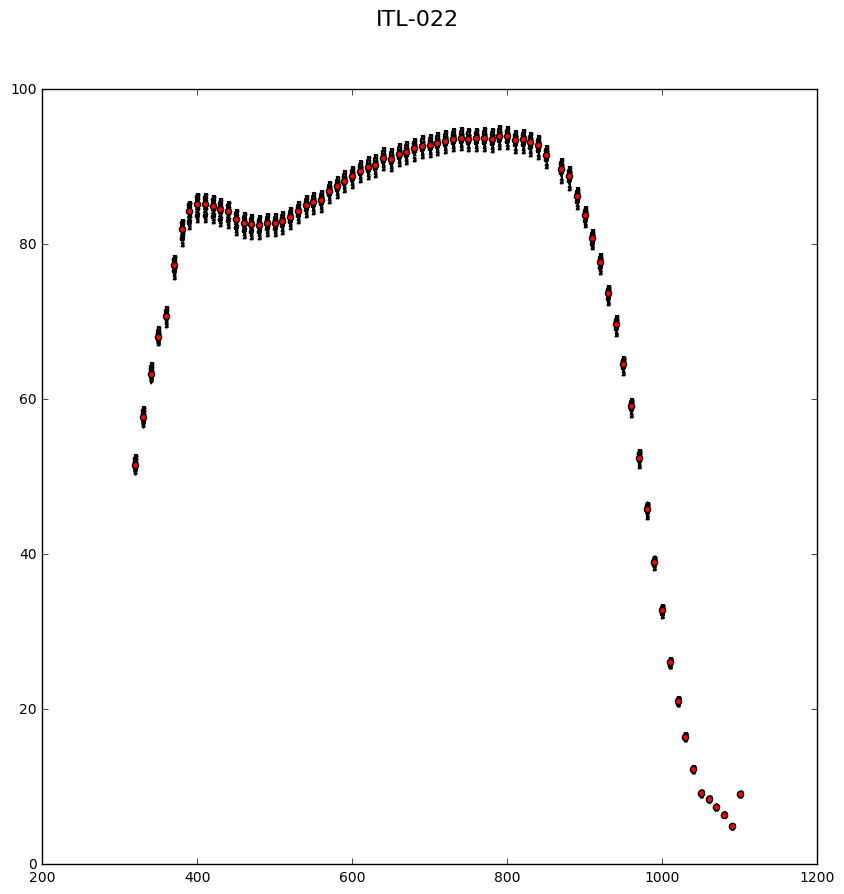

In [13]:
hdulist022=fits.open("ITL-3800C-022_QE.fits")
qedata=hdulist022[1].data
avg022=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg022)
#print ('AMP02 is bad and is omitted')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-022', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg022, 20,'r')
fig1.savefig('ITL-022.pdf')

[ 36.31827164  38.39946365  41.17482758  44.34717178  47.2119751
  56.73385239  67.53347015  75.47702789  81.30506134  85.54639435
  87.86368561  88.93703461  89.73471832  90.1867981   89.48549652
  88.9750061   88.36700439  88.02963257  87.39598846  87.09610748
  86.55459595  86.80435181  86.49972534  86.49768829  86.43006134
  86.4378891   86.77590179  87.19634247  87.27889252  87.74176025
  88.35965729  89.09647369  89.24002838  89.61437988  90.00577545
  90.88085175  90.99121094  91.62961578  92.48544312  92.52017212
  92.92598724  93.25113678  93.57711029  93.89820099  94.15917969
  94.62699127  94.498909    94.93442535  94.84101105  94.94284058
  95.32025146  94.79273224  94.24578094  93.30056     90.95192719
  89.82709503  87.57827759  85.09340668  81.39232635  77.94532013
  73.45819855  68.88663483  63.26334     57.50738907  50.62971115
  44.02568054  37.46297455  31.42089653  24.90056801  18.80718231
  15.59666729  11.29846668   8.55654144   7.80315542   6.82501221
   5.793644

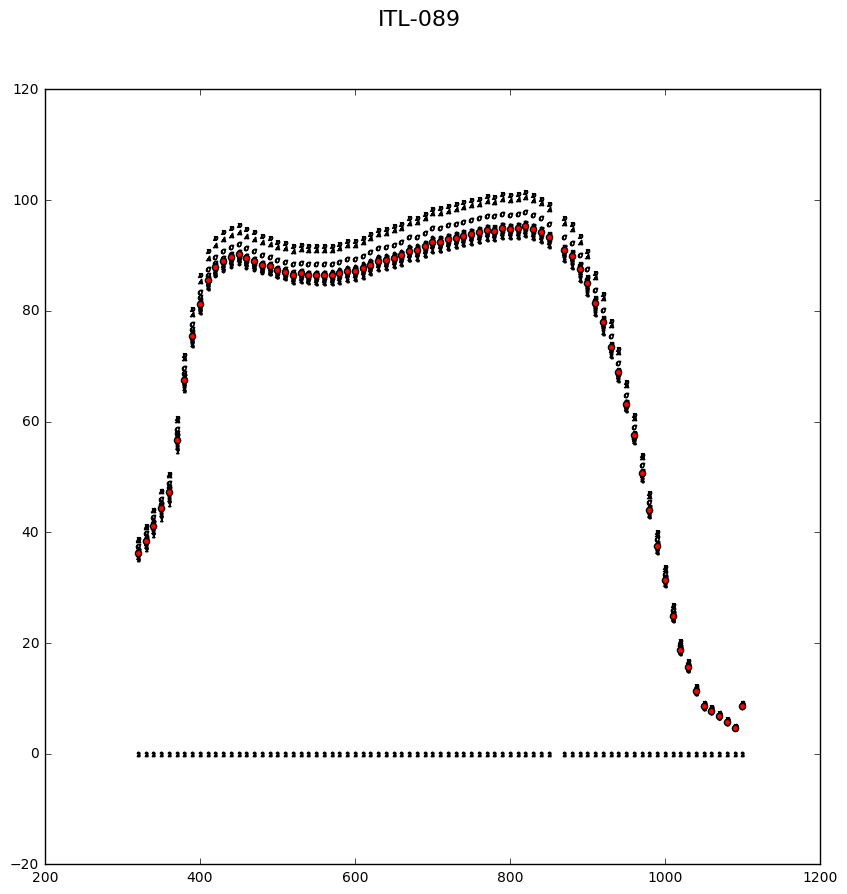

In [14]:
hdulist089=fits.open("ITL-3800C-089-Dev_QE.fits")
qedata=hdulist089[1].data
avg089=(qedata['AMP01']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/12
print (avg089)
print ('AMP02 is bad and is omitted')
print ('AMP10 11 and 12 are out of family and are omitted from the average')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-089', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg089, 20,'r')
fig1.savefig('ITL-089.pdf')

[ 40.32889557  44.01004791  48.09223938  52.18641663  55.90499496
  65.58662415  74.37788391  79.9924469   83.37255859  85.31449127
  86.1927948   86.26136017  85.93756866  85.54447937  84.82136536
  84.90757751  84.06074524  83.75152588  83.68914795  83.50746155
  83.48209381  83.91720581  83.89216614  84.11840057  84.24153137
  85.01879883  85.36328125  85.87698364  86.8142395   86.945961
  87.28573608  88.08878326  88.5017395   88.69163513  89.70932007
  89.68403625  90.13162231  90.83065796  91.06484222  91.80883789
  91.93544769  92.0651474   92.38583374  92.69904327  93.23713684
  92.92191315  93.19208527  93.41170502  93.43373108  93.3112793   93.399086
  93.07656097  92.53084564  91.40631104  89.14884186  87.72612762
  85.08034515  82.77380371  79.19689941  75.69908905  71.45274353
  67.13279724  62.06526184  56.39567566  49.72612381  43.30994415
  36.57301712  30.54174423  24.39251328  19.2468071   15.03743267
  10.885252     8.22544765   7.4822526    6.53124857   5.53094912
 

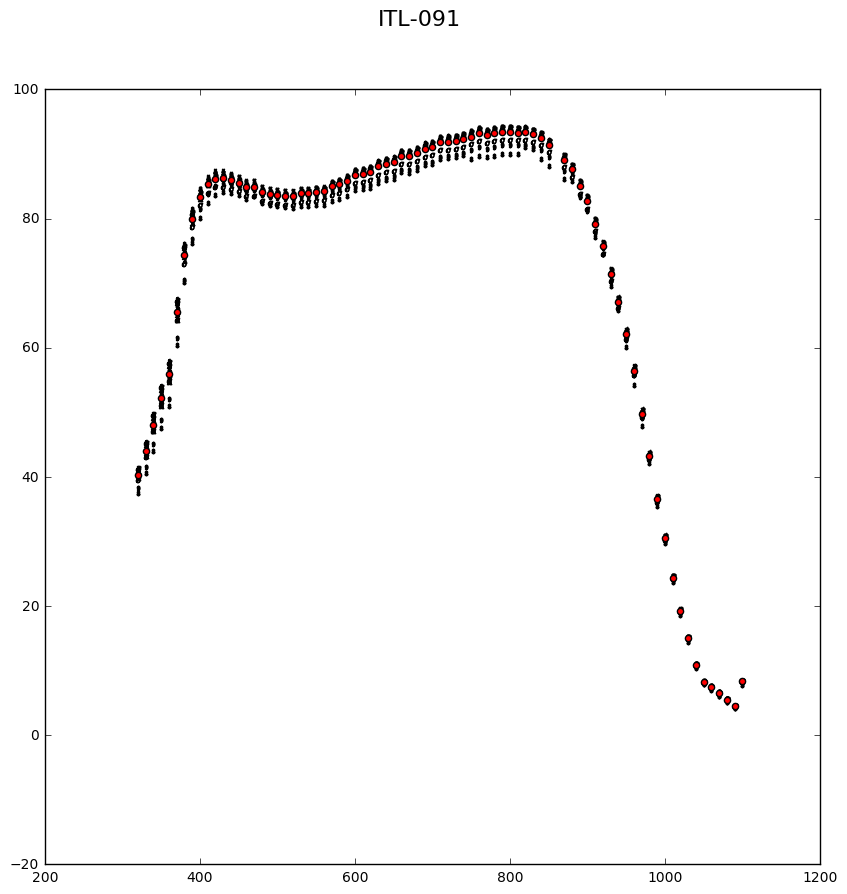

In [15]:
hdulist091=fits.open("ITL-3800C-091_QE.fits")
qedata=hdulist091[1].data
avg091=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg091)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-091', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg091, 20,'r')
fig1.savefig('ITL-091.pdf')

[ 43.28620529  47.65614319  52.6219368   57.67773056  62.44044113
  73.06808472  81.59359741  86.9624939   89.08587646  90.10641479
  90.38891602  89.9618988   88.94863892  87.69507599  86.7358551
  86.04793549  84.96665192  84.70833588  83.86420441  83.674263
  83.47119904  83.26317596  83.38259888  83.55245209  83.78433228
  84.26356506  84.69138336  85.32369995  85.70884705  86.08332825
  86.27539062  86.78421783  87.23006439  87.82066345  88.36368561
  88.53885651  89.19933319  89.55083466  90.19779205  90.09605408
  90.7852478   91.11755371  91.43556213  91.39074707  91.85871887
  91.9668808   91.91038513  92.56921387  92.42255402  92.42427063
  92.35031891  92.55802917  91.88787079  91.05108643  88.91000366
  88.10366058  85.7532196   83.25984955  80.34835815  77.1913147
  73.31241608  68.7808609   63.27517319  57.61190033  50.97675323
  44.55649185  38.0605011   31.87797928  25.3436718   18.94962311
  15.67946529  11.1471529    8.53696728   7.64091301   6.5989933
   5.51212025  

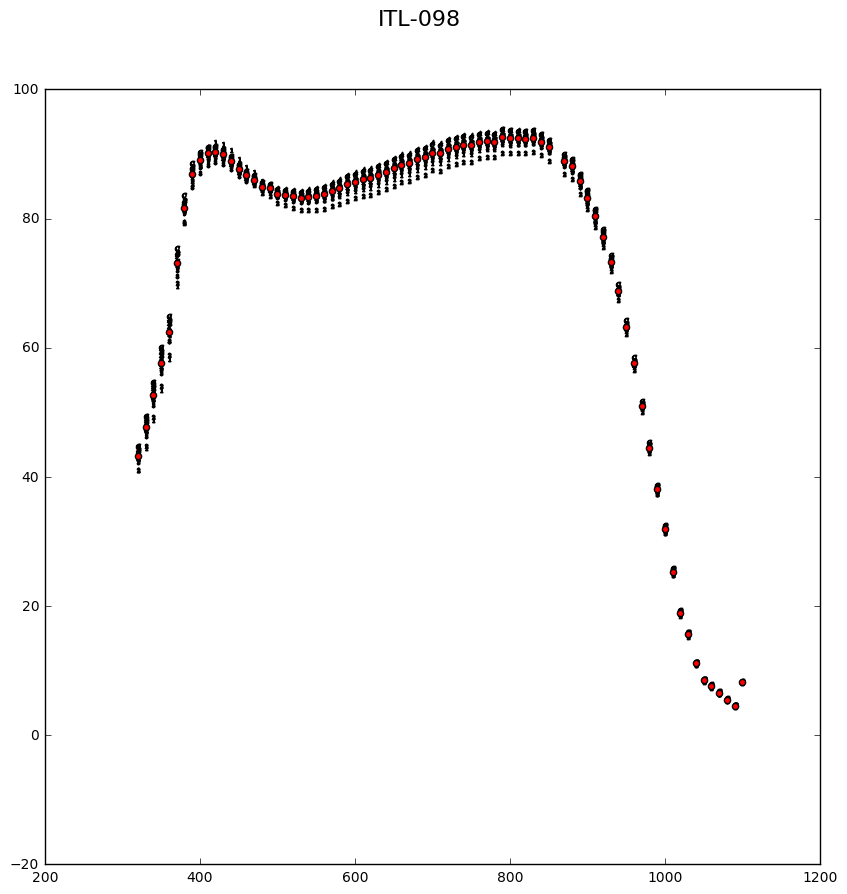

In [16]:
hdulist098=fits.open("ITL-3800C-098-Dev_QE.fits")
qedata=hdulist098[1].data
avg098=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg098)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-098', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg098, 20,'r')
fig1.savefig('ITL-098.pdf')

[ 48.13464355  52.907547    57.4294281   60.97768402  62.96555328
  69.85733032  75.76515198  79.44315338  81.0887146   82.17246246
  82.43363953  82.69690704  82.83638763  82.82198334  82.44934845
  82.60224915  82.33534241  82.8163681   82.93974304  83.41275024
  83.60881042  84.48335266  84.98234558  85.84799957  85.99011993
  87.41898346  87.76421356  88.72588348  89.6145401   90.35676575
  90.79692078  91.55537415  92.37909698  92.83712006  93.54216766
  93.63251495  94.1186676   94.89605713  94.81491852  95.00398254
  95.58963013  95.77323914  95.94816589  96.0536499   96.11995697
  96.16415405  95.74554443  96.25042725  95.60010529  95.52454376
  95.82132721  95.23229218  94.6300354   93.46287537  91.07080078
  89.85124207  87.71645355  84.72884369  81.27171326  77.92134094
  73.64295197  68.87541199  63.40414047  57.97104645  51.29789734
  44.95055008  37.85153198  31.73264313  25.21183395  20.33454514
  14.7116394   10.36701775   9.00798798   6.28142834   7.12739277
   6.06157

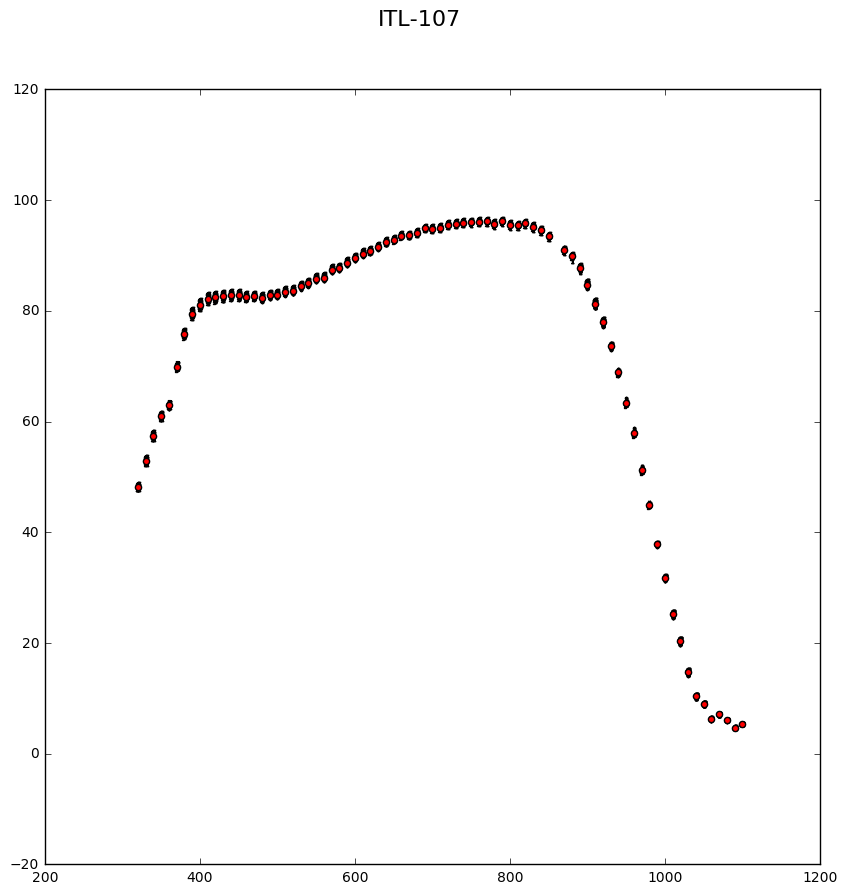

In [17]:
hdulist107=fits.open("ITL-3800C-107_QE.fits")
qedata=hdulist107[1].data
avg107=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg107)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-107', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg107, 20,'r')
fig1.savefig('ITL-107.pdf')

[ 48.15368652  53.35471344  58.22933197  62.40052795  64.84179688
  71.72372437  78.10172272  81.14051056  82.68978882  83.16776276
  83.13593292  82.95245361  82.94499207  82.53424835  82.30435181
  82.46283722  82.11480713  82.59092712  82.59454346  82.87812042
  83.32322693  83.75398254  84.4717865   85.25630951  85.50483704
  86.82486725  87.37794495  87.83797455  88.63078308  89.15664673
  89.69334412  90.03540039  90.64104462  90.90821075  91.46799469
  92.12504578  92.11128235  92.88219452  93.06465149  93.03217316
  93.66689301  93.67173004  93.97979736  93.83314514  93.94018555
  94.04840851  93.84945679  94.17647552  93.85940552  93.94035339
  94.13975525  93.97164917  93.01286316  92.05666351  89.98680878
  89.12599945  86.59120941  84.3747406   81.26057434  78.35251617
  74.42436218  69.98258972  65.01612091  59.48829269  52.63072968
  46.01839447  39.01786804  32.44808197  26.02049828  20.98822975
  16.46203804  12.21998692   9.07769299   8.46273899   7.36454439
   6.35926

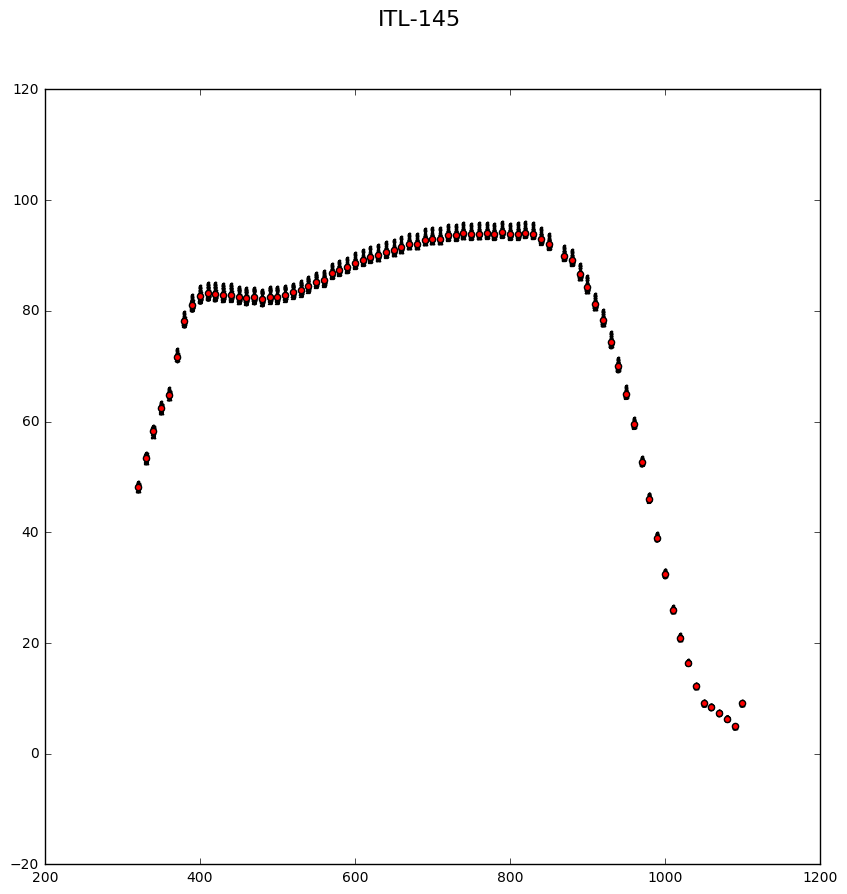

In [18]:
hdulist145=fits.open("ITL-3800C-145_QE.fits")
qedata=hdulist145[1].data
avg145=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg145)
#print ('AMP02 is bad and is omitted')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-145', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg145, 20,'r')
fig1.savefig('ITL-145.pdf')

[ 48.66188049  53.8857193   58.76296616  62.88232422  65.20212555
  71.87002563  77.72982025  80.99819183  82.62702942  83.26295471
  83.15550995  82.86035156  82.81581879  82.66374207  82.11717987
  82.48965454  82.10192871  82.21655273  82.86019897  82.89139557
  83.30505371  84.06063843  84.82849121  85.25180817  85.94467926
  86.74558258  87.63877869  88.12739563  88.89059448  89.44287109
  89.92972565  90.48445129  91.22210693  91.43815613  92.07306671
  92.46341705  92.78926849  93.13473511  93.48847198  93.47885895
  93.87947845  93.96470642  94.16954041  94.17938232  94.20664215
  94.38426971  94.34422302  94.18527222  94.00923157  94.08106995
  93.83979034  93.74019623  92.96613312  91.49551392  89.1866684
  88.25010681  85.6878891   83.23013306  79.70248413  76.26191711
  71.91975403  67.4858551   62.0242157   56.50424957  49.70893097
  43.29987335  36.93172073  31.00842857  25.48145676  19.79774857
  15.52841568  11.55884171   8.64039898   7.96736622   7.01114368
   6.039040

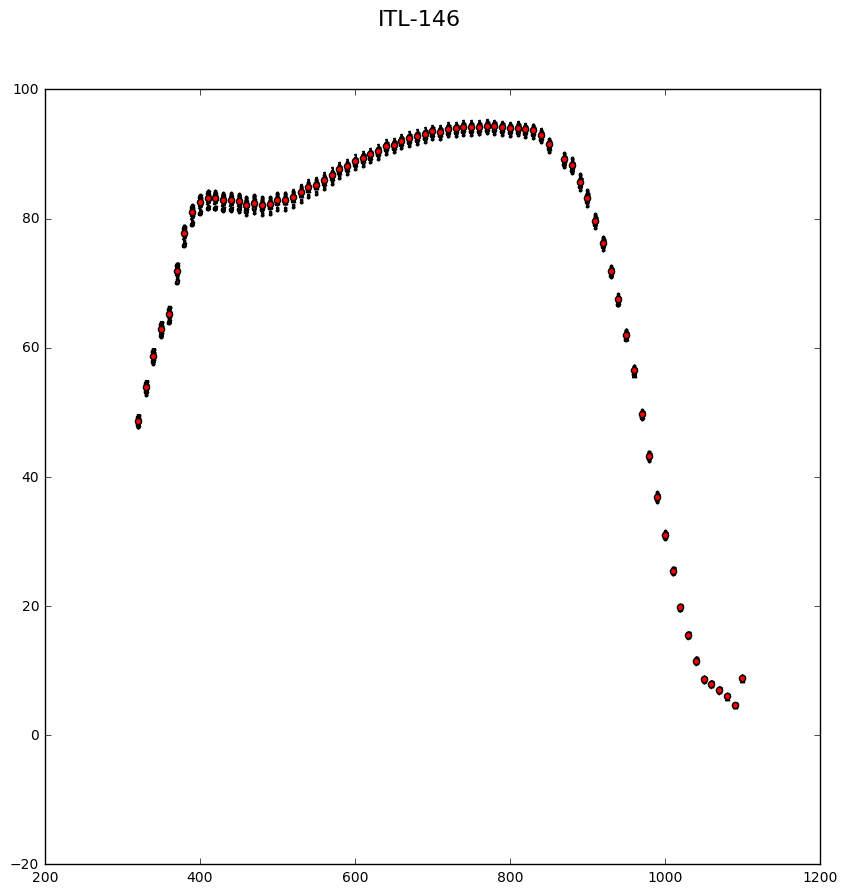

In [19]:
hdulist146=fits.open("ITL-3800C-146_QE.fits")
qedata=hdulist146[1].data
avg146=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg146)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-146', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg146, 20,'r')
fig1.savefig('ITL-146.pdf')

Filename: E2V-CCD250-137_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 43.74831772  54.80741119  63.5220871   67.77498627  67.63827515
  69.41928101  73.63499451  77.99993896  80.85139465  82.88326263
  84.99801636  86.4862442   87.51271057  89.03697968  90.17273712
  91.41604614  91.96739197  92.95824432  93.59998322  94.5973587
  94.89830017  95.58185577  96.18489075  96.53162384  96.04608917
  97.401474    97.56745148  97.47917938  97.84253693  97.86186218
  97.85839844  97.79817963  97.52355194  97.56177521  97.11258698
  97.00591278  97.24263763  96.72233582  96.61750793  95.99829865
  95.90055847  96.05445099  95.53888702  95.02133179  94.70928192
  94.2263031   93.86371613  93.60221863  9

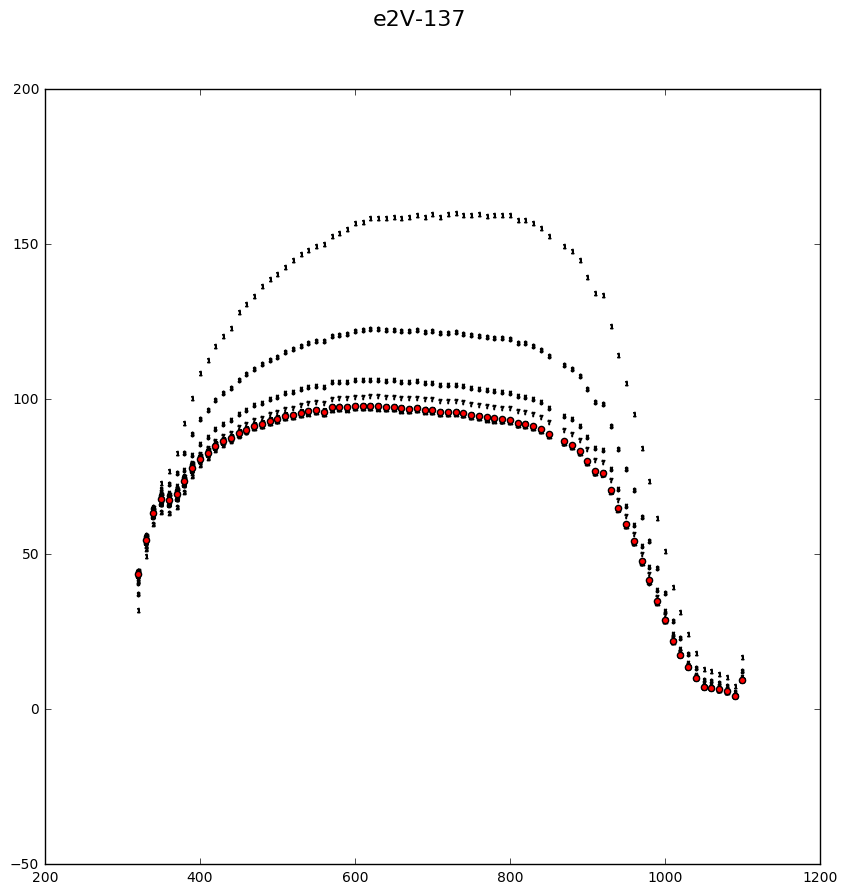

In [20]:
hdulist137e=fits.open("E2V-CCD250-137_QE.fits")
hdulist137e.info()
qedata=hdulist137e[1].data
avg137e=(qedata['AMP02']+qedata['AMP04']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/13
print (avg137e)
print ('AMP01 and AMP03 and AMP05 are badly out of family and are omitted from the mean')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-137', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg137e, 20,'r')
fig1.savefig('e2V-137.pdf')

Filename: E2V-CCD250-153_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 45.28545761  49.9141922   61.49208069  70.08558655  73.78872681
  76.45860291  79.49430084  81.97694397  83.91804504  84.65613556
  85.37955475  86.02284241  86.50347137  87.39340973  87.96057892
  88.86116028  89.36832428  90.1706543   90.9550705   91.61528015
  92.29831696  92.99163055  93.63690186  94.07369995  94.00766754
  95.23952484  95.43733978  96.04615021  96.29754639  96.74949646
  97.13278198  96.88617706  97.08562469  97.13453674  97.42033386
  97.51530457  97.34631348  97.56267548  97.40245819  97.54159546
  96.89138794  96.79824829  97.00532532  96.89115906  96.39413452
  95.85179138  95.64392853  95.45409393  

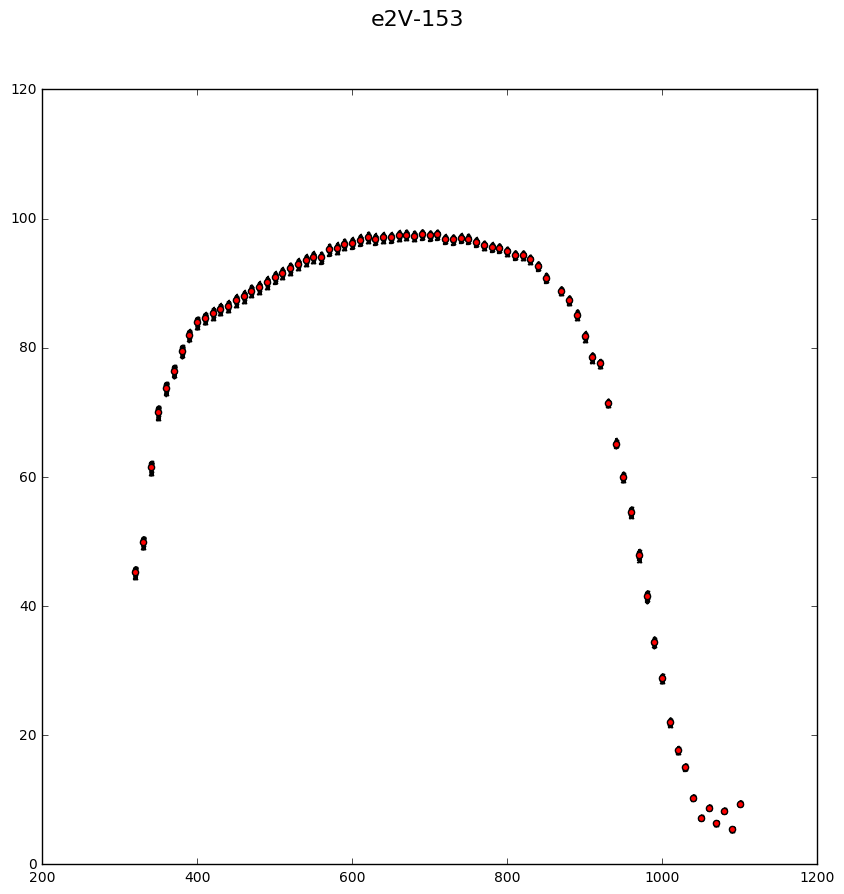

In [21]:
hdulist153e=fits.open("E2V-CCD250-153_QE.fits")
hdulist153e.info()
qedata=hdulist153e[1].data
avg153e=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg153e)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-153', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg153e, 20,'r')
fig1.savefig('e2V-153.pdf')

[ 45.42330933  56.07761765  64.06363678  67.84706879  67.28930664
  69.19801331  73.88961029  78.26660919  81.3299942   83.29243469
  85.4628067   87.01374817  88.20845032  89.44802856  90.9072876
  92.2928009   92.62795258  93.52362823  94.18630981  95.15338135
  95.60305023  95.9061203   96.41042328  96.55413818  96.44739532
  97.15378571  97.45680237  97.86057281  97.38238525  97.59667206
  97.32067108  97.34882355  97.19126129  96.83851624  96.77964783
  96.46788025  96.23535156  96.19342804  95.85835266  95.54943085
  95.33600616  94.85315704  94.54305267  94.39295197  93.71641541
  93.30986786  92.82688904  92.77803802  92.31997681  91.68933105
  91.1734314   90.57527161  89.49541473  88.01940918  85.51513672
  84.07929993  81.67950439  79.26077271  76.05774689  75.30175781
  69.36222839  63.70429993  58.51522827  53.06645584  46.43862534
  40.30624771  33.97387314  28.18158531  21.61414146  16.93195534
  12.80711079   9.38645458   6.86236143   6.3146472    5.84567642
   5.163321

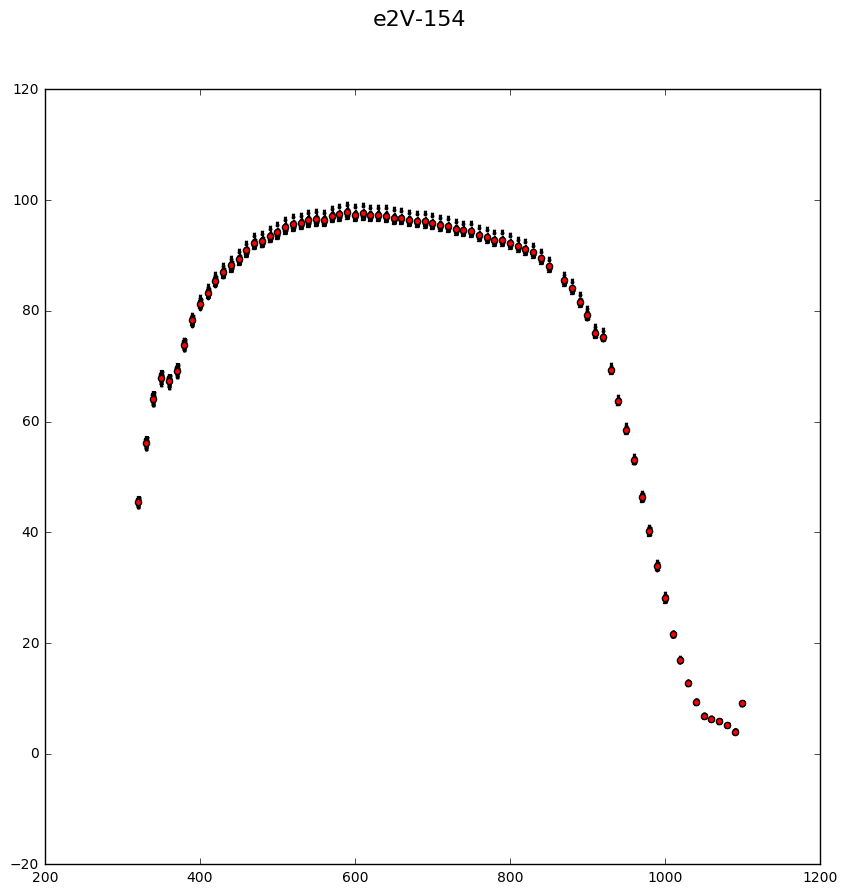

In [22]:
hdulist154e=fits.open("E2V-CCD250-154_QE.fits")
qedata=hdulist154e[1].data
avg154e=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg154e)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-154', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg154e, 20,'r')
fig1.savefig('e2V-154.pdf')

Filename: E2V-CCD250-163_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 37.62270355  48.59405518  59.91809082  68.36982727  72.37355042
  75.96795654  79.04691315  82.25032043  83.70632172  84.58401489
  85.67861938  86.20407867  87.04624939  87.47651672  88.59362793
  89.00688171  89.77579498  90.73419189  91.35209656  91.75167084
  92.4753952   93.43081665  93.72429657  94.5451355   94.40871429
  95.59565735  95.74620056  96.44593048  96.86379242  96.89317322
  97.4580307   97.35231018  97.43958282  97.84771729  97.96393585
  98.31477356  98.04510498  97.79729462  97.80474854  97.48059082
  97.3728714   97.19643402  97.2081604   97.04206848  96.61936951
  96.68202209  96.11492157  95.81671906  

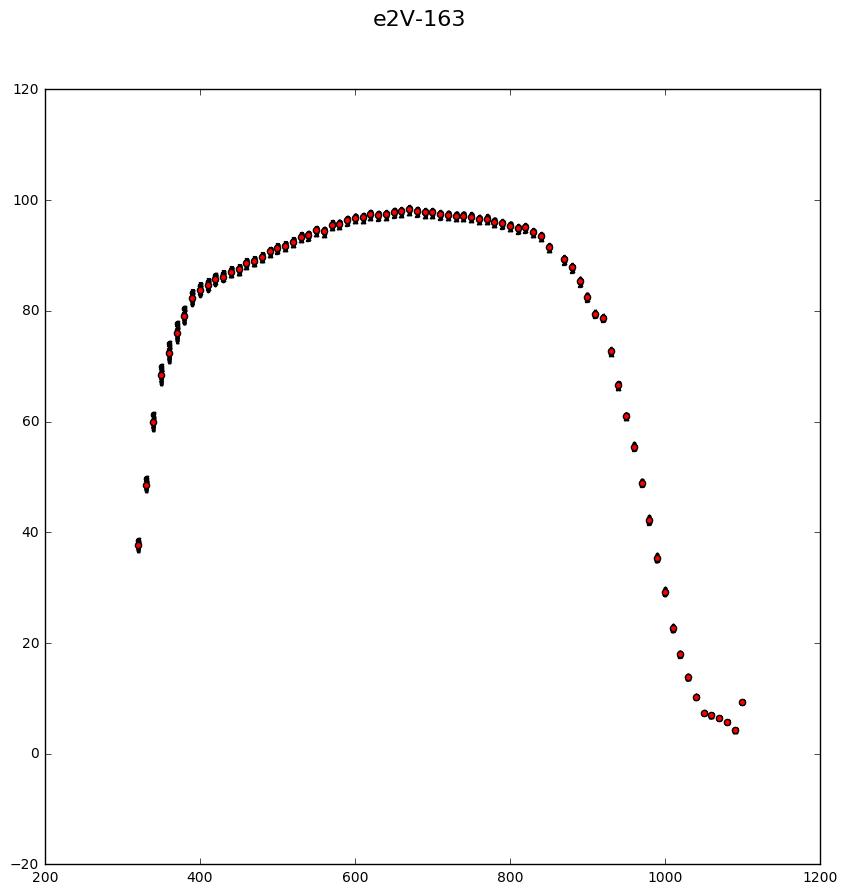

In [23]:
hdulist163e=fits.open("E2V-CCD250-163_QE.fits")
hdulist163e.info()
qedata=hdulist163e[1].data
avg163e=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg163e)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-163', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg163e, 20,'r')
fig1.savefig('e2V-163.pdf')

Filename: E2V-CCD250-165_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 41.14639664  53.39026642  65.20922089  74.32695007  77.79259491
  80.67708588  82.8478241   84.85097504  85.83686066  86.53423309
  86.98059845  87.64027405  87.95817566  88.66917419  89.56443024
  90.10395813  91.16809845  91.84998322  92.11827087  92.85631561
  93.55987549  94.02280426  94.42753601  94.82907867  94.98448181
  95.96178436  96.53551483  96.87437439  97.25709534  97.50046539
  97.48283386  98.06871796  97.92655182  98.05277252  98.12572479
  98.10826111  98.39984894  98.17894745  97.82849884  97.56700897
  97.62345123  97.55712891  97.57279968  97.02891541  96.9111557
  96.31145477  96.2206192   95.75896454  9

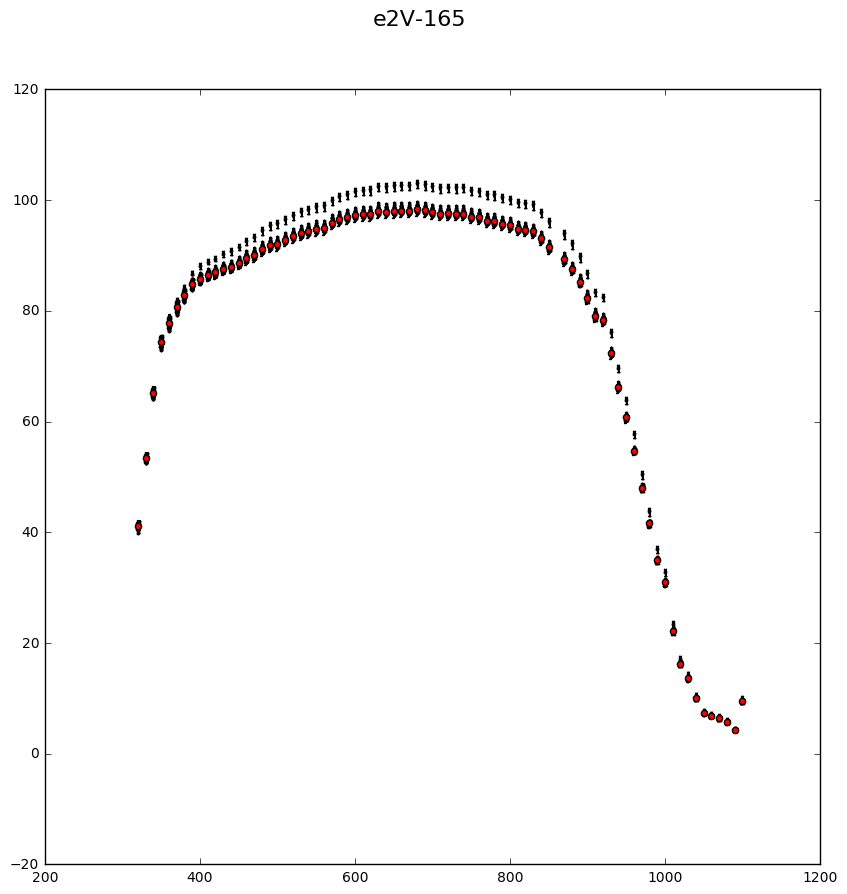

In [24]:
hdulist165e=fits.open("E2V-CCD250-165_QE.fits")
hdulist165e.info()
qedata=hdulist165e[1].data
avg165e=(qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/14
print (avg165e)
#print ('AMP01 and 5 are badly out of family and are omitted in the average')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-165', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg165e, 20,'r')
fig1.savefig('e2V-165.pdf')

Filename: E2V-CCD250-177_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 36.88230133  47.90820312  58.73353958  66.93079376  70.08125305
  72.91184235  76.5064621   79.88432312  81.99008942  83.79567719
  84.50025177  85.39828491  86.31455994  87.53206635  88.09169769
  89.04302216  90.10888672  90.94019318  91.6029129   92.16612244
  92.97470093  93.74794006  94.42816162  94.70043945  94.89588165
  95.99490356  96.42904663  97.16801453  97.36050415  97.63815308
  97.84924316  98.13436127  98.27693939  98.12201691  98.32594299
  98.30458832  98.31085968  98.6171875   98.70985413  98.04803467
  98.0668335   98.31214905  97.87532806  97.37093353  97.26358795
  96.86743927  96.48475647  96.34520721  

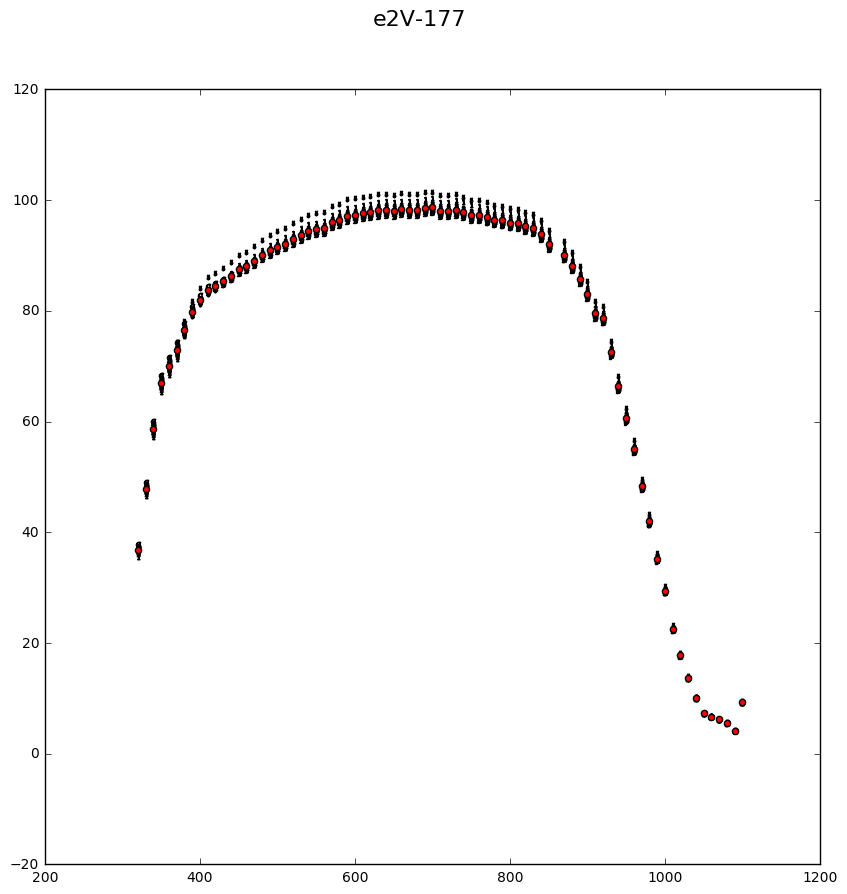

In [25]:
hdulist177e=fits.open("E2V-CCD250-177_QE.fits")
hdulist177e.info()
qedata=hdulist177e[1].data
avg177e=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg177e)
#print ('AMP02 is bad and is omitted')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-177', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg177e, 20,'r')
fig1.savefig('e2V-177.pdf')

Filename: E2V-CCD250-179_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   77R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 39.20226669  50.67092514  61.36722946  68.14559937  69.82242584
  71.34661102  74.55458069  77.9017334   80.21377563  82.01411438
  83.76177216  84.57596588  85.55066681  86.6466217   87.54000854
  88.54903412  89.3915329   90.38434601  91.41275024  91.96099091
  92.69759369  93.43618774  94.07579803  94.52175903  94.49213409
  95.68405151  96.1489563   96.65333557  97.14533997  97.34252167
  97.50779724  97.71394348  97.53944397  97.5519104   97.56053925
  97.92958069  97.5776825   97.82711029  97.51822662  97.57019043
  97.19380951  96.82743835  96.70020294  96.4680481   95.87467957
  95.63864136  95.28031158  95.06761932  

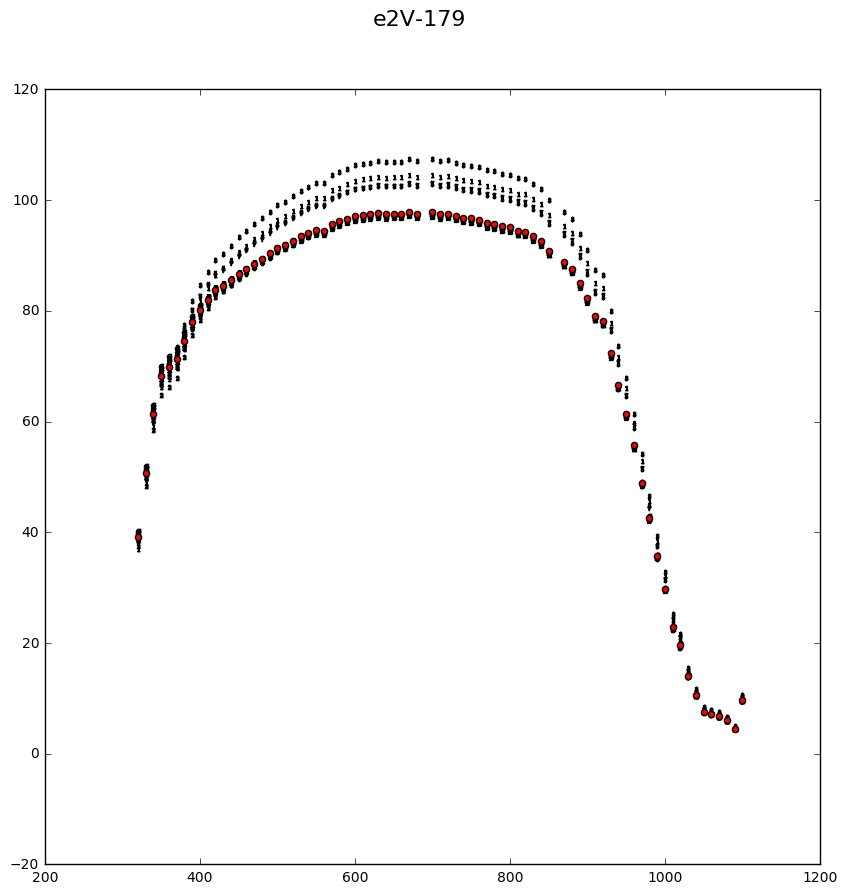

In [26]:
hdulist179e=fits.open("E2V-CCD250-179_QE.fits")
hdulist179e.info()
qedata=hdulist179e[1].data
avg179e=(qedata['AMP02']+qedata['AMP04']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/13
print (avg179e)
print ('AMPs 1 3 and 5 are badly out of family and omitted from the average')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-179', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg179e, 20,'r')
fig1.savefig('e2V-179.pdf')

Filename: E2V-CCD250-216_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 36.73540497  47.53102112  58.76752853  67.95145416  72.68722534
  76.86727142  80.13892365  83.0819397   84.38405609  84.98609161
  85.86224365  86.45484161  87.07424164  87.47317505  87.98935699
  88.91989136  89.22512817  89.90032196  90.7996521   91.19366455
  92.09220123  92.83742523  93.27028656  93.80193329  93.59572601
  94.75075531  95.31746674  95.60739136  96.60610199  96.85399628
  96.62242889  96.87872314  97.12944794  97.34980011  97.59429932
  97.49924469  97.40164185  97.85759735  97.58353424  97.34807587
  97.26394653  97.02024078  97.04885864  96.8873291   96.54576874
  96.22071075  96.00522614  95.97866058  

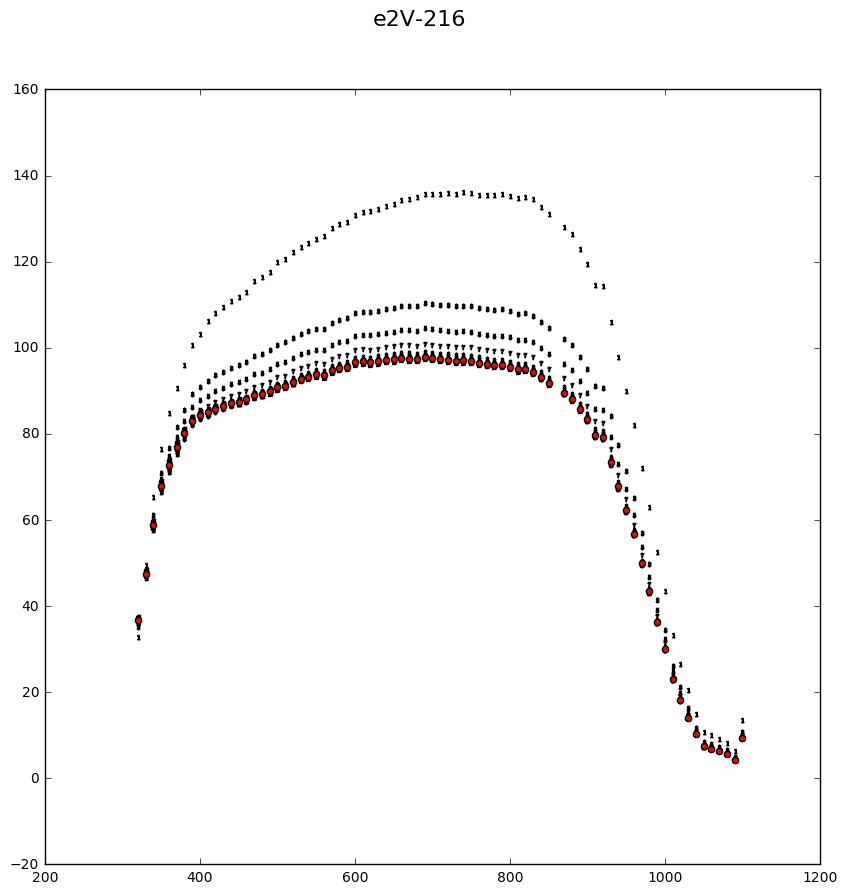

In [27]:
hdulist216e=fits.open("E2V-CCD250-216_QE.fits")
hdulist216e.info()
qedata=hdulist216e[1].data
avg216e=(qedata['AMP02']+qedata['AMP04']+qedata['AMP06']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/12
print (avg216e)
print ('AMP01 and 3 and 5 and 7 are particularly badly normalized and are omitted from the average')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-216', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg216e, 20,'r')
fig1.savefig('e2V-216.pdf')

Filename: E2V-CCD250-217_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 48.18501663  52.31801605  63.56272125  71.50294495  74.03986359
  75.68824768  78.38498688  81.43238831  83.29418182  83.98300171
  85.24373627  86.01763153  87.04146576  87.6077652   88.36515808
  89.3687973   90.12446594  90.99423218  91.5100174   92.20253754
  92.86945343  93.91226959  94.51074219  94.80913544  94.61107635
  96.06434631  96.09908295  96.84642792  97.13665771  97.22830963
  97.77697754  97.74406433  97.53110504  97.55010223  97.87283325
  97.64154053  97.82067108  97.73419952  97.3860321   97.66041565
  97.24770355  96.88392639  96.98096466  96.54879761  96.41307068
  96.20187378  95.51753235  95.37268066  

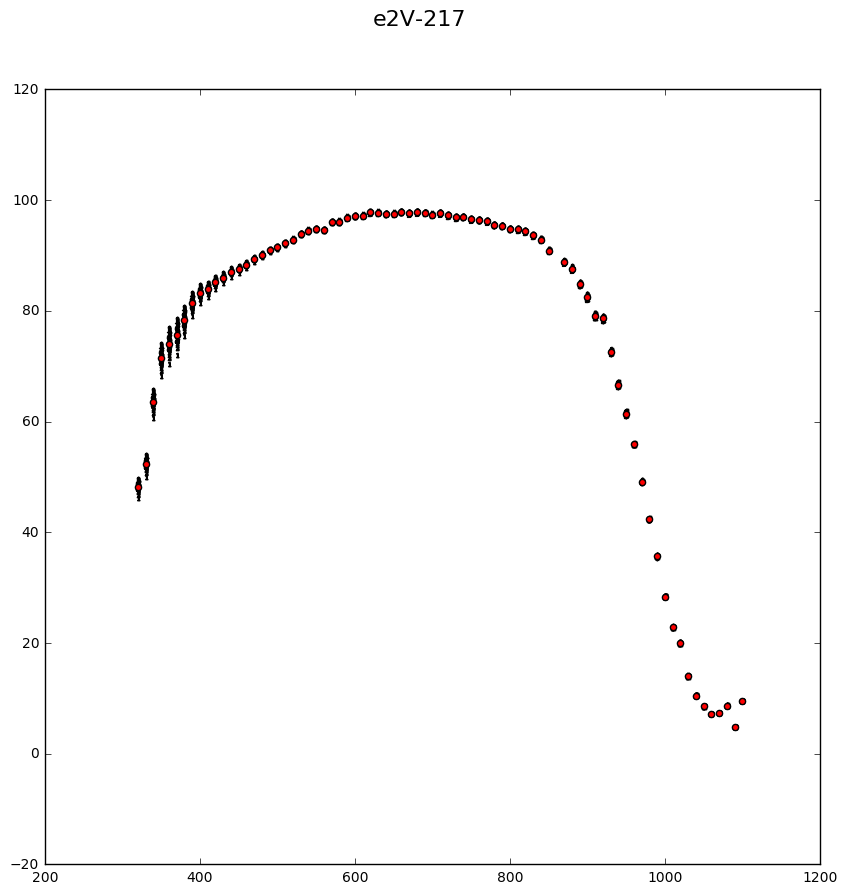

In [28]:
hdulist217e=fits.open("E2V-CCD250-217_QE.fits")
hdulist217e.info()
qedata=hdulist217e[1].data
avg217e=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg217e)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-217', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg217e, 20,'r')
fig1.savefig('e2V-217.pdf')

Filename: E2V-CCD250-229_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 42.12307739  54.40671921  66.39567566  74.38819885  76.76856995
  78.26706696  80.32427979  82.90106201  83.92842865  85.02262878
  85.85736847  86.51365662  87.22320557  87.72200775  88.79398346
  89.47912598  90.23657227  90.86962128  92.00209045  92.10752869
  92.76657867  93.69033813  94.07028198  94.65776062  94.48490143
  95.48867798  95.96311951  96.19200134  96.9101181   97.01304626
  97.23423004  97.20968628  97.26535034  97.33534241  97.3782196
  97.21685028  97.17029572  97.50470734  97.24476624  96.74803162
  96.6046524   96.44028473  96.36365509  96.34146881  95.95526886
  95.41606903  95.08187866  95.05742645  9

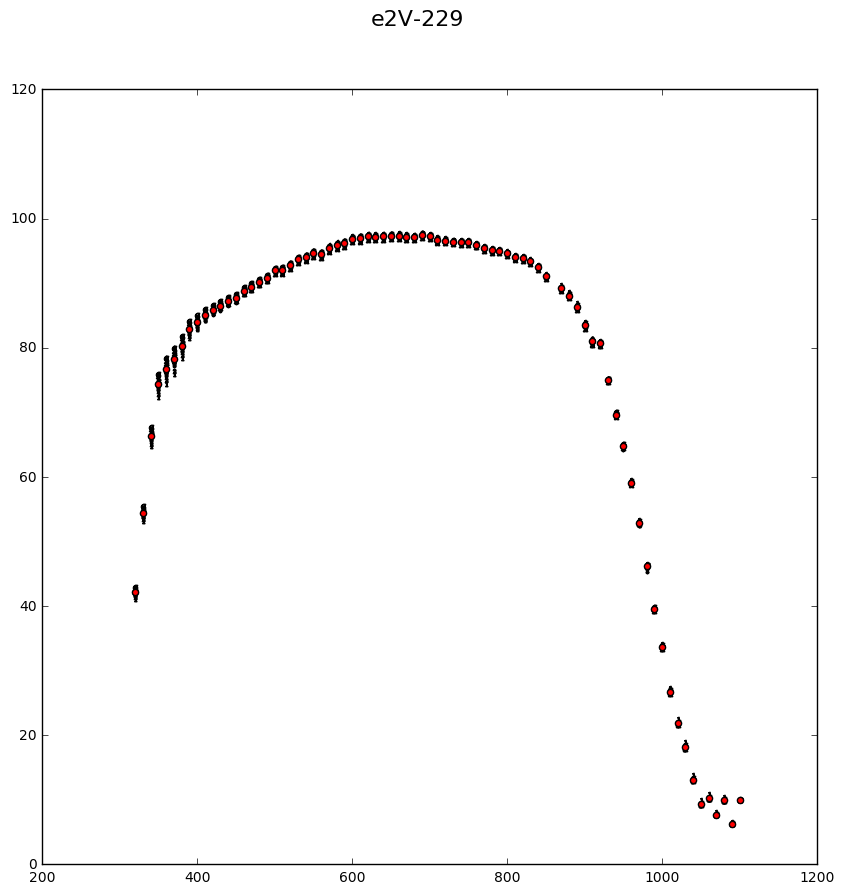

In [29]:
hdulist229e=fits.open("E2V-CCD250-229_QE.fits")
hdulist229e.info()
qedata=hdulist229e[1].data
avg229e=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg229e)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-229', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg229e, 20,'r')
fig1.savefig('e2V-229.pdf')

Filename: E2V-CCD250-239_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
[ 46.53352737  60.578125    73.35745239  81.70193481  83.12229156
  83.42250061  84.11943054  85.42258453  85.99228668  86.44439697
  86.99264526  87.35739899  88.28117371  88.68344879  89.11097717
  90.08666992  90.53503418  91.4805603   92.13298035  92.86270142
  93.0304718   93.65137482  94.49086761  94.54512024  94.65398407
  95.71987152  95.93799591  96.32247162  96.63386536  97.19872284
  97.03298187  97.31077576  97.51689911  97.38015747  97.79536438
  97.24365234  97.17834473  97.46444702  97.23177338  96.74920654
  96.70623779  96.61166382  96.4340744   96.09301758  96.17088318
  95.56181335  95.29209137  94.94077301  

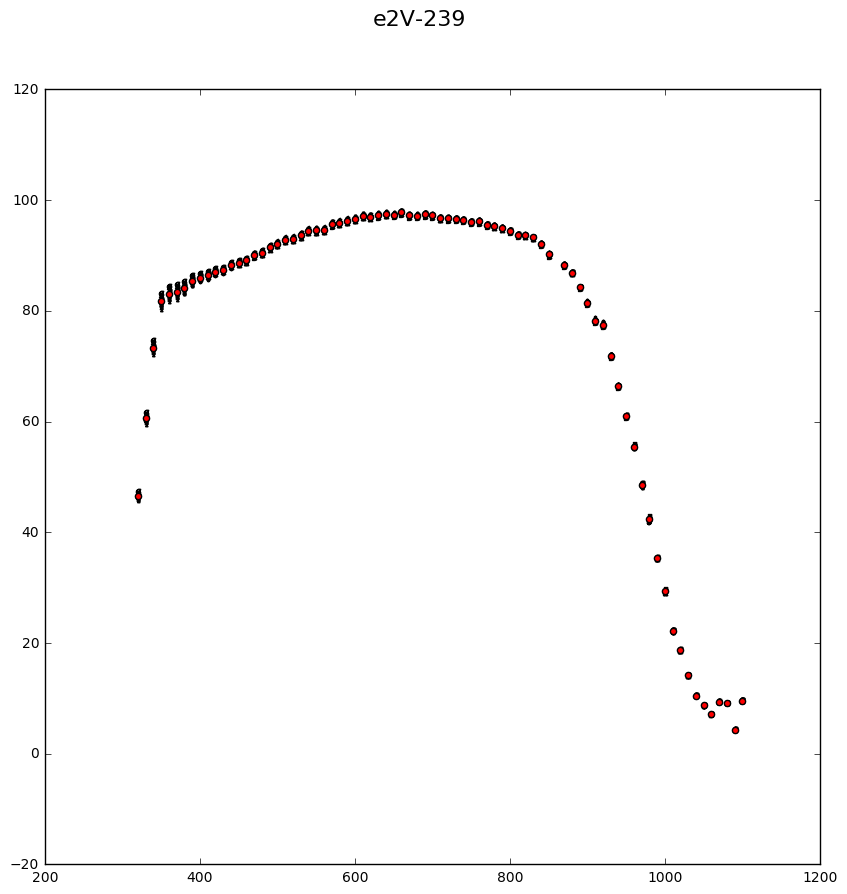

In [30]:
hdulist239e=fits.open("E2V-CCD250-239_QE.fits")
hdulist239e.info()
qedata=hdulist239e[1].data
avg239e=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg239e)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('e2V-239', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg239e, 20,'r')
fig1.savefig('e2V-239.pdf')

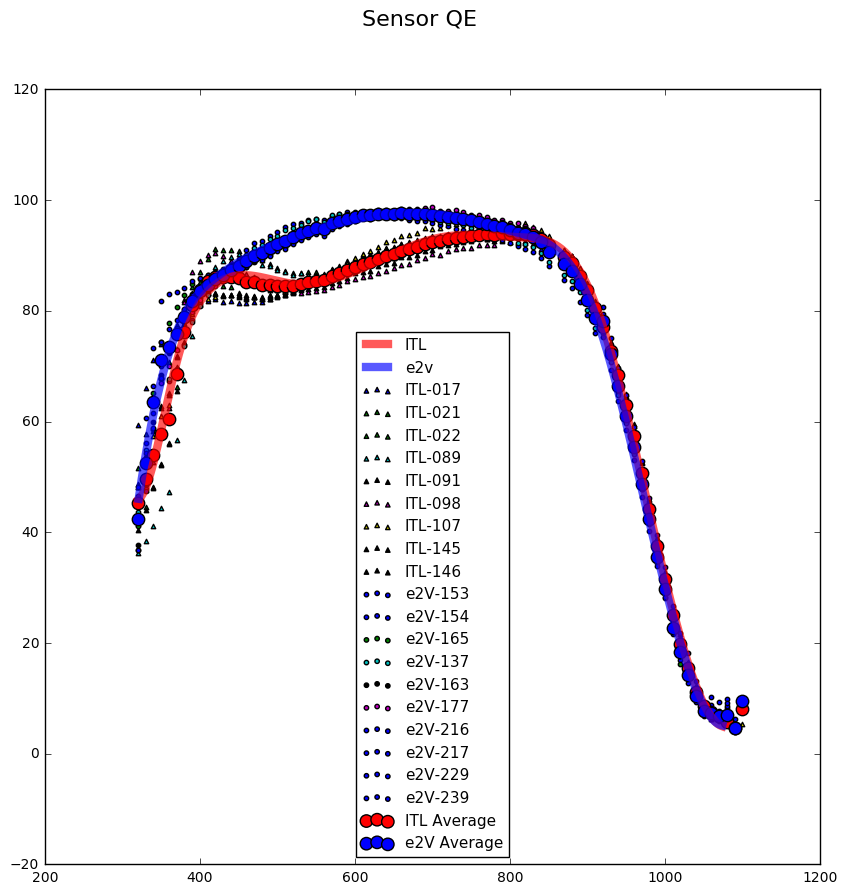

In [31]:
superavg=(avg017+avg021+avg089+avg091+avg098+avg107+avg146)/7
superavge=(avg137e+avg153e+avg154e+avg163e+avg165e+avg177e+avg216e+avg217e+avg229e+avg239e)/10
# now let's interpolate
from scipy import interpolate
#itl=interpolate.interp1d(wavelength,superavg,kind='cubic')
#e2v=interpolate.interp1d(wavelength,superavge,kind='cubic')
itl=interpolate.UnivariateSpline(wavelength,superavg)
e2v=interpolate.UnivariateSpline(wavelength,superavge)
lambda1=np.arange(321,1075,1)
itlcurve=itl(lambda1)
e2vcurve=e2v(lambda1)
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('Sensor QE', fontsize=16)
plt.plot(lambda1, itlcurve,'r',linewidth=6,label='ITL',alpha=0.65)
plt.plot(lambda1, e2vcurve,'b', linewidth=6, label='e2v',alpha=0.65)
plt.scatter(wavelength, avg017, 10,'blue','^',label='ITL-017')
plt.scatter(wavelength, avg021, 10,'g','^',label='ITL-021')
plt.scatter(wavelength, avg022, 10,'g','^', label='ITL-022')
plt.scatter(wavelength, avg089, 10,'c','^', label='ITL-089')
plt.scatter(wavelength, avg091, 10,'black','^', label='ITL-091')
plt.scatter(wavelength, avg098, 10,'m','^', label='ITL-098')
plt.scatter(wavelength, avg107, 10,'y','^', label='ITL-107')
plt.scatter(wavelength, avg145, 10,'k','^', label='ITL-145')
plt.scatter(wavelength, avg146, 10,'k','^', label='ITL-146')
plt.scatter(wavelength, avg153e, 10,'b', label='e2V-153')
plt.scatter(wavelength, avg154e, 10,'b', label='e2V-154')
plt.scatter(wavelength, avg165e, 10,'g', label='e2V-165')
plt.scatter(wavelength, avg137e, 10,'c', label='e2V-137')
plt.scatter(wavelength, avg163e, 10,'black', label='e2V-163')
plt.scatter(wavelength, avg177e, 10,'m', label='e2V-177')
plt.scatter(wavelength, avg216e, 10,'b', label='e2V-216')
plt.scatter(wavelength, avg217e, 10,'b', label='e2V-217')
plt.scatter(wavelength, avg229e, 10,'b', label='e2V-229')
plt.scatter(wavelength, avg239e, 10,'b', label='e2V-239')
plt.scatter(wavelength, superavg, 80,'r', label='ITL Average')
plt.scatter(wavelength, superavge, 80,'b', label='e2V Average')
#plt.scatter(wavelength, avg179e, 50,'y', label='e2V-179')
#fig1.legend(loc=2,prop={'size':6})
pylab.legend(loc='lower center',prop={'size':11})
fig1.savefig('SensorQE.pdf')

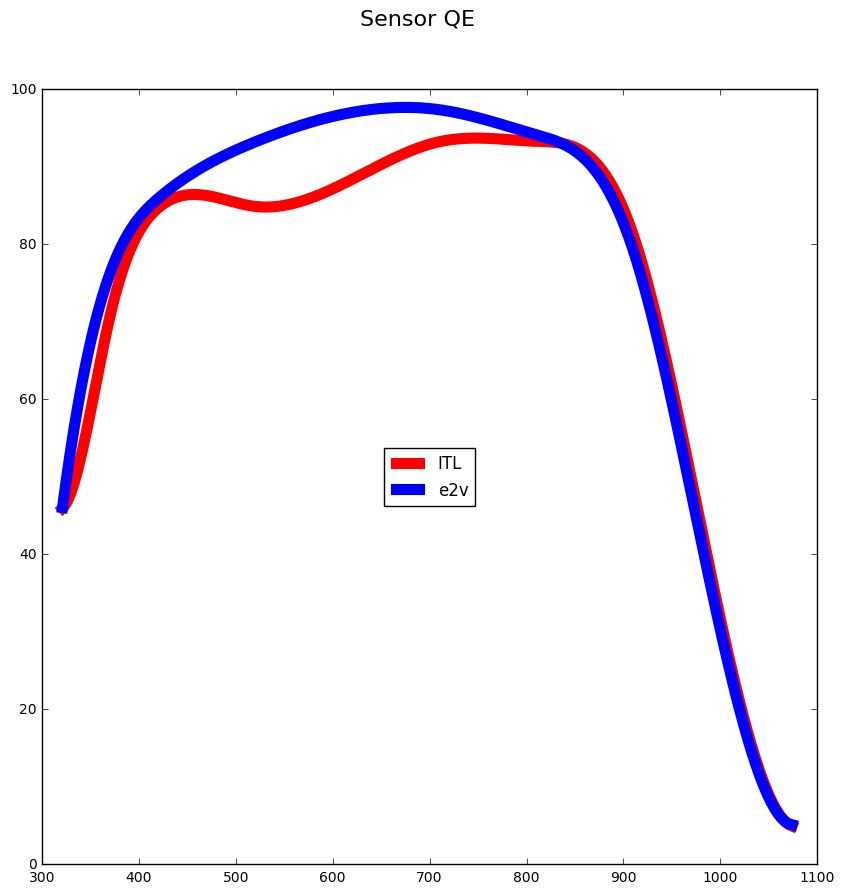

In [32]:

fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('Sensor QE', fontsize=16)
plt.plot(lambda1, itlcurve,'r',linewidth=8,label='ITL')
plt.plot(lambda1, e2vcurve,'b', linewidth=8, label='e2v')
pylab.legend(loc='center')
fig1.savefig('qecurves.pdf')
# and output
file1 = open("itl2017apr13.txt","w")
for i in range(len(lambda1)):
    print (round(lambda1[i],1),round(itlcurve[i],1), file=file1)
file1.close()
file1 = open("e2v2017apr13.txt","w")
for i in range(len(lambda1)):
    print (round(lambda1[i],1),round(e2vcurve[i],1), file=file1)
file1.close()